In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
%matplotlib inline

In [2]:
train_data=pd.read_csv('../input/particles-datasets/training.csv.gz')
train_data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


In [3]:
test_data=pd.read_csv('../input/particles-datasets/test.csv.gz')
test_data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,ID
0,55086.199233,18.0,-0.438763,0.0,1.0,3.2,-1.843821,-4.579244,1.0,-1.732886,...,1.0,18.674086,-1.355015,24510.990244,0.0,1.0,9.325265,-0.250015,35.408585,0
1,3393.820071,17.0,-0.554341,0.0,1.0,0.0,-0.883237,-6.203035,1.0,-0.097206,...,1.0,16.536804,-17.601196,778.675303,0.0,1.0,-0.000006,-6.646096,14.011904,1
2,18341.359361,12.0,-0.554339,0.0,1.0,0.0,-2.653786,-3.922639,1.0,0.936484,...,1.0,-1.306109,-4.536409,7915.212420,0.0,1.0,1.371346,-2.132609,-5.617409,2
3,27486.710933,7.0,-0.492411,1.0,1.0,3.2,-999.000000,2.034453,1.0,-999.000000,...,1.0,-4.222793,3.149207,-999.000000,1.0,1.0,61.985428,0.946207,-8.657193,3
4,6842.249996,16.0,0.098706,0.0,1.0,3.2,2.644499,-1.471364,1.0,-2.909470,...,1.0,-3.425113,23.147387,-0.000013,0.0,1.0,2.468453,2.614987,-5.713513,4


In [4]:
train_data.shape

(1200000, 50)

In [5]:
test_data.shape

(1200000, 50)

In [6]:
train_data.describe()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,...,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,1.614162e+04,1.475170e+01,-2.077315e+02,1.908400e-01,8.531908e-01,-1.443849e+02,-1.828275e+02,-1.266902e+01,9.514050e-01,-1.830022e+02,...,2.942221e+01,9.187425e-01,-5.183805e+01,-5.103860e+01,2.900030e+03,1.662333e-01,8.209933e-01,-1.338948e+02,-4.919965e+01,-5.223401e+01
std,2.790366e+04,4.038073e+00,4.054632e+02,3.929634e-01,3.539157e-01,3.545035e+02,3.854803e+02,1.049158e+02,2.150199e-01,3.853958e+02,...,6.029159e+00,2.732303e-01,2.153209e+02,2.150846e+02,7.686446e+03,3.722901e-01,3.833581e-01,3.628977e+02,2.147605e+02,2.152330e+02
min,1.115380e+03,1.000000e+00,-9.990000e+02,0.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,-9.990000e+02,...,7.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02
25%,4.137650e+03,1.300000e+01,-6.389485e-01,0.000000e+00,1.000000e+00,0.000000e+00,-3.000639e+00,-5.711142e+00,1.000000e+00,-3.367626e+00,...,2.600000e+01,1.000000e+00,-1.469941e+01,-1.310509e+01,-1.438680e-05,0.000000e+00,1.000000e+00,9.222748e-06,-4.503331e+00,-1.619484e+01
50%,8.069835e+03,1.600000e+01,-5.329026e-01,0.000000e+00,1.000000e+00,3.200000e+00,-2.321410e+00,-1.988139e+00,1.000000e+00,-1.956064e+00,...,3.000000e+01,1.000000e+00,-1.207258e-06,-2.356098e+00,5.780127e+02,0.000000e+00,1.000000e+00,2.468449e+00,-4.697510e-01,-2.928758e-06
75%,1.750157e+04,1.800000e+01,-5.933819e-02,0.000000e+00,1.000000e+00,3.200000e+00,5.918621e-01,1.669210e+00,1.000000e+00,4.339380e-01,...,3.400000e+01,1.000000e+00,8.465107e+00,1.674137e+00,3.046122e+03,0.000000e+00,1.000000e+00,8.502449e+00,1.300086e+00,8.922095e+00
max,4.750951e+06,3.000000e+01,4.791513e+00,1.000000e+00,1.000000e+00,3.200000e+00,4.341298e+00,1.471079e+01,1.000000e+00,2.153017e+00,...,5.200000e+01,1.000000e+00,1.588015e+02,1.861542e+02,8.682200e+05,1.000000e+00,1.000000e+00,2.805800e+02,1.428335e+02,1.462984e+02


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 50 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   TrackP                           1200000 non-null  float64
 1   TrackNDoFSubdetector2            1200000 non-null  float64
 2   BremDLLbeElectron                1200000 non-null  float64
 3   MuonLooseFlag                    1200000 non-null  float64
 4   FlagSpd                          1200000 non-null  float64
 5   SpdE                             1200000 non-null  float64
 6   EcalDLLbeElectron                1200000 non-null  float64
 7   DLLmuon                          1200000 non-null  float64
 8   RICHpFlagElectron                1200000 non-null  float64
 9   EcalDLLbeMuon                    1200000 non-null  float64
 10  TrackQualitySubdetector2         1200000 non-null  float64
 11  FlagPrs                          1200000 non-null 

In [8]:
train_data['Label'].value_counts()

Muon        200000
Ghost       200000
Pion        200000
Proton      200000
Kaon        200000
Electron    200000
Name: Label, dtype: int64

In [9]:
label_to_class = {'Electron': 0, 'Ghost': 1, 'Kaon': 2, 'Muon': 3, 'Pion': 4, 'Proton': 5}
class_to_label = {0: 'Electron', 1: 'Ghost', 2: 'Kaon', 3: 'Muon', 4: 'Pion', 5: 'Proton'}

def get_class_ids(labels):
    return np.array([label_to_class[i] for i in labels])

In [10]:
train_data['Class'] = get_class_ids(train_data.Label.values)

In [44]:
train_data['Class'].unique()

array([3, 1, 4, 5, 2, 0])

In [12]:
features = list(set(train_data.columns) - {'Label', 'Class'})

In [13]:
features

['RICH_DLLbeMuon',
 'TrackNDoFSubdetector1',
 'FlagHcal',
 'RICHpFlagMuon',
 'PrsE',
 'DLLelectron',
 'TrackDistanceToZ',
 'MuonLLbeMuon',
 'GhostProbability',
 'FlagPrs',
 'TrackQualitySubdetector2',
 'TrackNDoFSubdetector2',
 'DLLproton',
 'BremDLLbeElectron',
 'SpdE',
 'MuonLLbeBCK',
 'FlagBrem',
 'EcalDLLbeMuon',
 'RICHpFlagElectron',
 'HcalDLLbeMuon',
 'TrackNDoF',
 'FlagRICH1',
 'FlagEcal',
 'Calo3dFitQuality',
 'RICH_DLLbeProton',
 'FlagSpd',
 'HcalE',
 'MuonFlag',
 'TrackP',
 'RICHpFlagProton',
 'RICH_DLLbeKaon',
 'DLLkaon',
 'PrsDLLbeElectron',
 'TrackQualityPerNDoF',
 'MuonLooseFlag',
 'EcalE',
 'TrackQualitySubdetector1',
 'EcalShowerLongitudinalParameter',
 'RICHpFlagPion',
 'EcalDLLbeElectron',
 'HcalDLLbeElectron',
 'RICH_DLLbeElectron',
 'Calo2dFitQuality',
 'RICH_DLLbeBCK',
 'FlagMuon',
 'DLLmuon',
 'FlagRICH2',
 'TrackPt',
 'RICHpFlagKaon']

In [14]:
training, validation = train_test_split( train_data ,test_size = 0.1, random_state=0)
print(len(training), len(validation))

1080000 120000


## Using KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(training[features].values, training.Class.values)

KNeighborsClassifier(n_neighbors=3)

In [16]:
result_knn=model_knn.predict(validation[features].values)

In [17]:
target_names = ['Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton']
print(classification_report(validation.Class.values, result_knn, target_names=target_names))

              precision    recall  f1-score   support

    Electron       0.60      0.78      0.68     20207
       Ghost       0.33      0.44      0.37     19812
        Kaon       0.29      0.32      0.31     19751
        Muon       0.81      0.78      0.79     20299
        Pion       0.33      0.20      0.25     19981
      Proton       0.33      0.22      0.26     19950

    accuracy                           0.46    120000
   macro avg       0.45      0.46      0.44    120000
weighted avg       0.45      0.46      0.45    120000



In [48]:
result_knn[:100]

array([1, 4, 5, 1, 1, 3, 2, 0, 2, 2, 3, 3, 3, 0, 0, 3, 1, 2, 5, 4, 0, 1,
       0, 0, 2, 2, 2, 2, 0, 5, 0, 0, 1, 0, 2, 2, 4, 2, 5, 0, 3, 0, 0, 5,
       1, 3, 3, 0, 4, 2, 3, 1, 5, 5, 5, 4, 2, 2, 3, 4, 1, 0, 0, 2, 1, 0,
       3, 0, 2, 4, 2, 2, 2, 3, 2, 1, 5, 1, 4, 0, 1, 3, 3, 1, 4, 0, 0, 1,
       3, 2, 2, 3, 0, 1, 3, 2, 3, 4, 1, 0])

## Using XGBoost

In [26]:
from xgboost import XGBClassifier
clf_XGB = XGBClassifier()
clf_XGB.fit(training[features].values, training.Class.values)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:52:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [28]:
result_xgb=clf_XGB.predict(validation[features].values)

In [29]:
target_names = ['Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton']
print(classification_report(validation.Class.values, result_xgb, target_names=target_names))

              precision    recall  f1-score   support

    Electron       0.88      0.89      0.89     20207
       Ghost       0.77      0.80      0.78     19812
        Kaon       0.66      0.64      0.65     19751
        Muon       0.92      0.92      0.92     20299
        Pion       0.74      0.79      0.76     19981
      Proton       0.68      0.60      0.64     19950

    accuracy                           0.78    120000
   macro avg       0.77      0.78      0.77    120000
weighted avg       0.78      0.78      0.78    120000



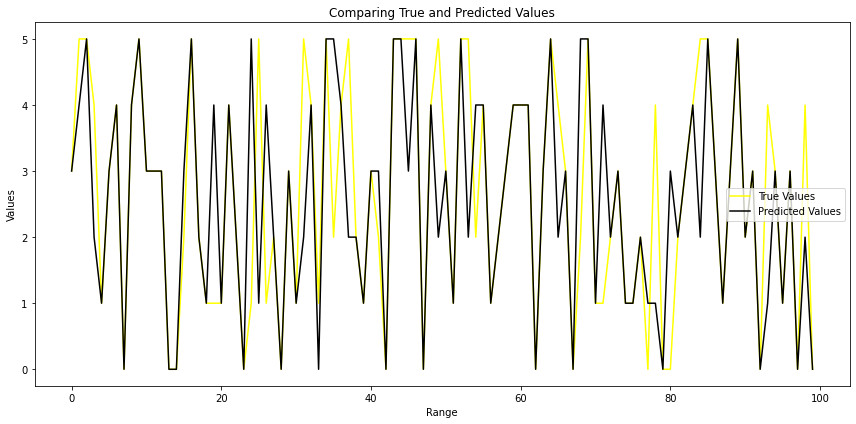

In [39]:
plt.figure(figsize=(12,6))
plt.xlabel('Range')
plt.ylabel('Values')
plt.plot(range(100), validation.Class.values[:100], color = 'yellow', label = 'True Values')
plt.plot(range(100), result_xgb[:100], color = 'black', label = 'Predicted Values')
plt.title('Comparing True and Predicted Values')
plt.legend()

plt.tight_layout()

## Using NN

In [21]:
def nn_model(input_dim):
    model = Sequential()
    model.add(Dense(1000, input_dim=input_dim))
    model.add(Activation('tanh'))
    model.add(Dense(500))
    model.add(Activation('tanh'))
    model.add(Dense(100))
    model.add(Activation('tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam())
    return model

In [22]:
model_nn = nn_model(len(features))
model_nn.fit(training[features].values, np_utils.to_categorical(training.Class.values),  verbose=1,epochs= 20, batch_size=256)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/20
4219/4219 [==============================] - 59s 14ms/step - loss: 1.2227
Epoch 2/20
4219/4219 [==============================] - 59s 14ms/step - loss: 1.1161
Epoch 3/20
4219/4219 [==============================] - 59s 14ms/step - loss: 1.0771
Epoch 4/20
4219/4219 [==============================] - 59s 14ms/step - loss: 1.0568
Epoch 5/20
4219/4219 [==============================] - 58s 14ms/step - loss: 1.0472
Epoch 6/20
4219/4219 [==============================] - 58s 14ms/step - loss: 1.0430
Epoch 7/20
4219/4219 [==============================] - 59s 14ms/step - loss: 1.0394
Epoch 8/20
4219/4219 [==============================] - 58s 14ms/step - loss: 1.0348
Epoch 9/20
4219/4219 [==============================] - 58s 14ms/step - loss: 1.0358
Epoch 10/20
4219/4219 [==============================] - 58s 14ms/step - loss: 1.0287
Epoch 11/20
4219/4219 [==============================] - 57s 14ms/step - loss: 1.0274
Epoch 12/20
4219/4219 [==============================] - 58s 14

In [23]:
result_nn=model_nn.predict(validation[features].values)

In [24]:
target_names = ['Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton']
print(classification_report(validation.Class.values, np.argmax(result_nn,axis=1), target_names=target_names))

              precision    recall  f1-score   support

    Electron       0.78      0.75      0.77     20207
       Ghost       0.49      0.42      0.45     19812
        Kaon       0.39      0.44      0.41     19751
        Muon       0.78      0.85      0.81     20299
        Pion       0.55      0.62      0.58     19981
      Proton       0.43      0.35      0.38     19950

    accuracy                           0.57    120000
   macro avg       0.57      0.57      0.57    120000
weighted avg       0.57      0.57      0.57    120000



In [25]:
log_loss(validation.Class.values, result_nn)

0.9953954258023295

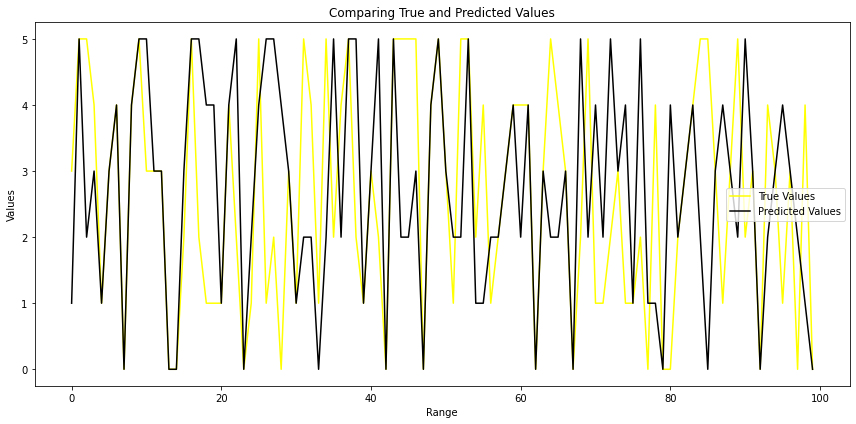

In [40]:
plt.figure(figsize=(12,6))
plt.xlabel('Range')
plt.ylabel('Values')
plt.plot(range(100), validation.Class.values[:100], color = 'yellow', label = 'True Values')
plt.plot(range(100), np.argmax(result_nn[:100],axis=1), color = 'black', label = 'Predicted Values')
plt.title('Comparing True and Predicted Values')
plt.legend()

plt.tight_layout()